# Projet Machine Learning

In [5]:
# numpy and pandas for data manipulation 
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Training data
app_test = pd.read_csv('application_test.csv')
print('Training data shape: ', app_test.shape)
app_test.head()

Training data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#The target is what we are asked to predict: either a 0 for the loan was repaid on time, 
#or a 1 indicating the client had payment difficulties.
#We can first examine the number of loans falling into each category.

app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

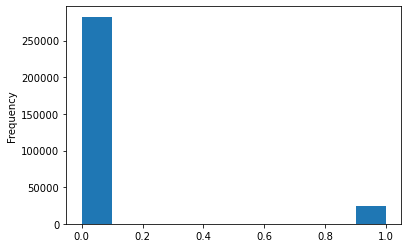

In [11]:
app_train['TARGET'].astype(int).plot.hist()

# Examiner les valeurs manquantes

In [12]:
#Examiner les valeurs manquantes
#Ensuite, nous pouvons regarder le nombre et le pourcentage de valeurs manquantes dans chaque colonne

# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


# Types de colonnes

In [14]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [15]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Encodage

In [16]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0
# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
encodage one-hot des variables catégorielles

In [17]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


# Aligner les données de formation et de test

In [19]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


# Retour à l'analyse exploratoire des données
Anomalies

In [20]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [21]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

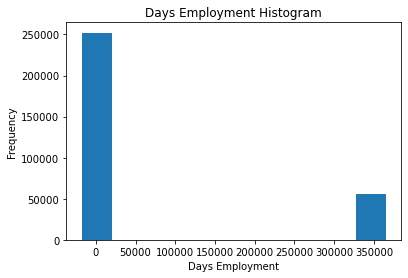

In [25]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment'.r) 

In [26]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5, 0, 'Days Employment')

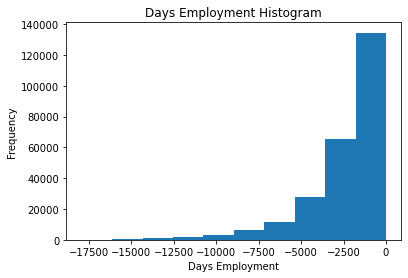

In [27]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

In [28]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


# Correlations

In [29]:
 #Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Effet de l'âge sur le remboursement

In [30]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

Text(0, 0.5, 'Count')

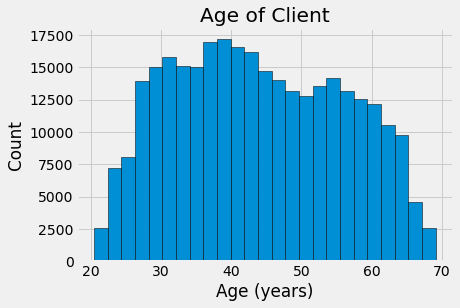

In [31]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Ages')

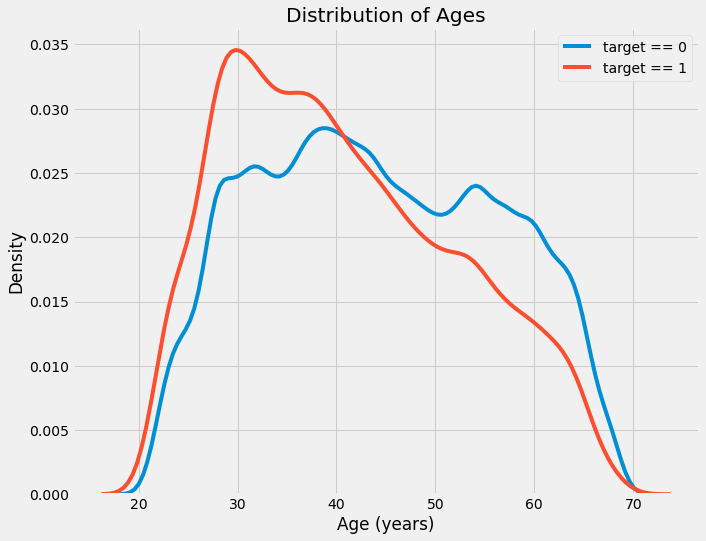

In [32]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

In [33]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [34]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

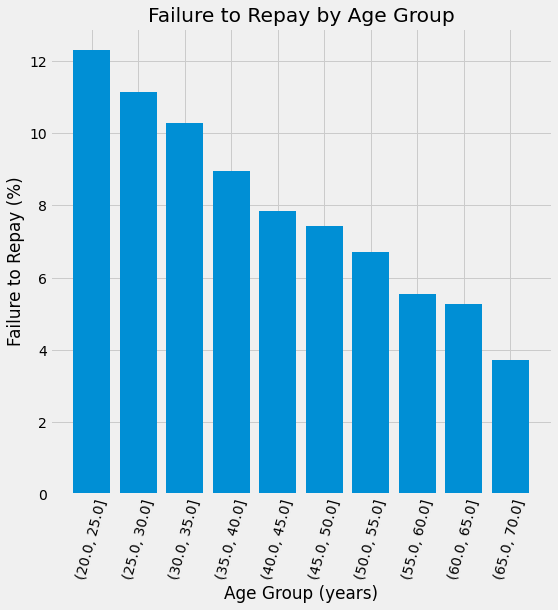

In [35]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

In [36]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

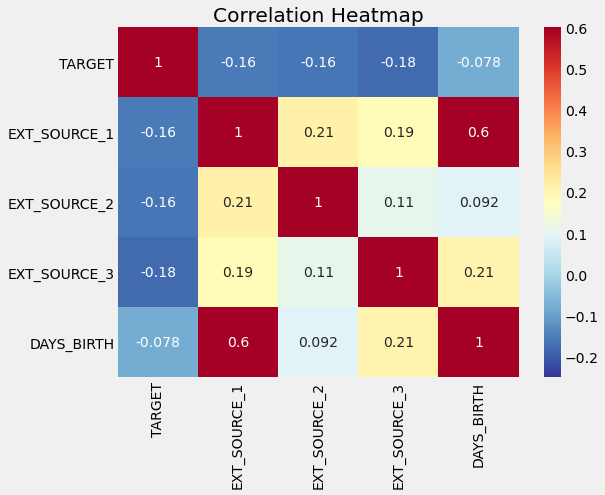

In [37]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

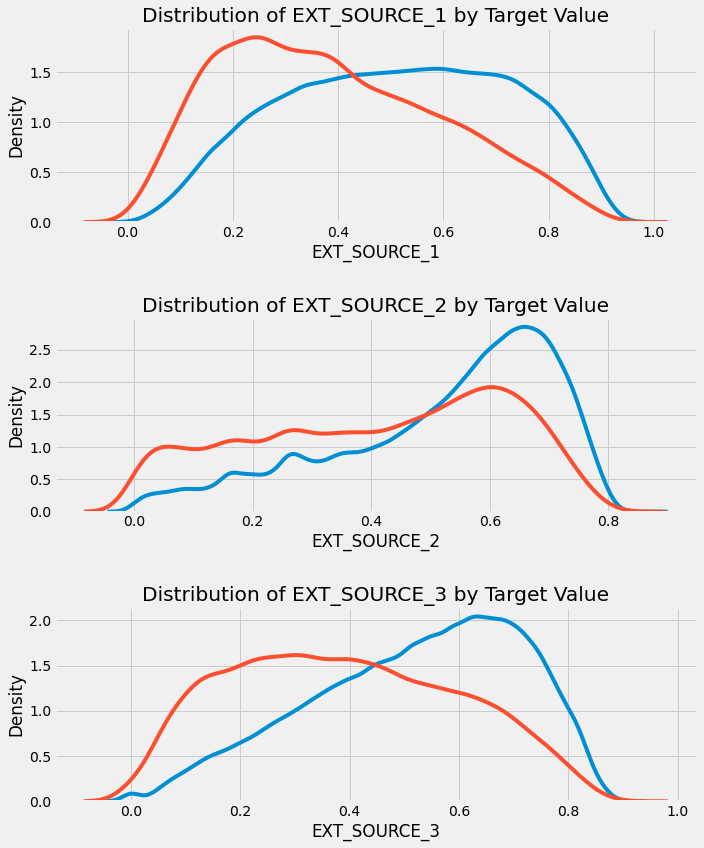

In [64]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [38]:
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,1,0,1,0,False
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,False
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,False
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,1,0,0,1,0,False
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,1,0,121500.0,412560.0,17473.5,270000.0,0.002042,...,0,0,0,0,0,0,0,0,0,False
48740,456222,0,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,...,0,0,0,0,0,0,0,0,0,False
48741,456223,0,1,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,...,0,0,0,0,0,1,0,1,0,False
48742,456224,0,0,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,...,0,0,0,0,1,0,0,1,0,False


In [39]:
app_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,1,0,1,0,1,False
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,0,1,0,0,False
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0,0,0,0,1,0,1,0,0,False
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0,0,0,0,1,0,1,0,0,True
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0,0,0,1,0,0,1,0,0,False
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0,0,0,0,1,0,1,0,1,False


In [40]:
app_train = app_train.replace('?', np.nan)
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,1,0,1,0,1,False
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,0,1,0,0,False
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,False


In [41]:
app_train = app_train.astype('float')
app_train.isnull().sum()

SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
FLAG_OWN_CAR                 0
FLAG_OWN_REALTY              0
CNT_CHILDREN                 0
                            ..
WALLSMATERIAL_MODE_Wooden    0
EMERGENCYSTATE_MODE_No       0
EMERGENCYSTATE_MODE_Yes      0
TARGET                       0
DAYS_EMPLOYED_ANOM           0
Length: 241, dtype: int64

In [42]:
app_train = app_train.dropna(subset=['TARGET'])
app_train.isnull().sum()

SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
FLAG_OWN_CAR                 0
FLAG_OWN_REALTY              0
CNT_CHILDREN                 0
                            ..
WALLSMATERIAL_MODE_Wooden    0
EMERGENCYSTATE_MODE_No       0
EMERGENCYSTATE_MODE_Yes      0
TARGET                       0
DAYS_EMPLOYED_ANOM           0
Length: 241, dtype: int64

In [43]:
# Remplacer les valeurs manquantes dans d'autres colonnes en utilisant la moyenne.
app_train = app_train.fillna(app_train.mean())

In [44]:
app_train.isnull().sum()

SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
FLAG_OWN_CAR                 0
FLAG_OWN_REALTY              0
CNT_CHILDREN                 0
                            ..
WALLSMATERIAL_MODE_Wooden    0
EMERGENCYSTATE_MODE_No       0
EMERGENCYSTATE_MODE_Yes      0
TARGET                       0
DAYS_EMPLOYED_ANOM           0
Length: 241, dtype: int64

In [45]:
# Normaliser toutes les colonnes de sorte que les valeurs soient comprises entre 0 et 1 sauf pour la colonne cible.
prix_col = app_train['TARGET']
app_train = (app_train - app_train.min())/(app_train.max() - app_train.min())
app_train['TARGET'] = prix_col

app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
0,0.000000,0.0,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.000003,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000006,1.0,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000011,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000014,0.0,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
app_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
0,0.000000,0.0,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.000003,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000006,1.0,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000011,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000014,0.0,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.999989,0.0,0.0,0.0,0.0,0.001127,0.052360,0.101176,0.046016,0.446855,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
307507,0.999992,0.0,0.0,1.0,0.0,0.000396,0.056067,0.040505,0.046016,0.344429,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
307508,0.999994,0.0,0.0,1.0,0.0,0.001089,0.157969,0.110618,0.135802,0.065247,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
307509,0.999997,0.0,0.0,1.0,0.0,0.001243,0.081175,0.072499,0.069585,0.069553,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [47]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 241 entries, SK_ID_CURR to DAYS_EMPLOYED_ANOM
dtypes: float64(241)
memory usage: 567.8 MB


In [48]:
app_train.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.500146,0.095213,0.340108,0.693673,0.021950,0.001224,0.138334,0.099423,0.124179,0.284944,...,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570,0.080729,0.180072
std,0.288531,0.293509,0.473746,0.460968,0.038006,0.002027,0.100497,0.056525,0.092101,0.191521,...,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679,0.272419,0.384248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250225,0.000000,0.000000,0.000000,0.000000,0.000742,0.056180,0.058143,0.049383,0.134537,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500206,0.000000,0.000000,1.000000,0.000000,0.001039,0.116987,0.090821,0.102132,0.257000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.749862,0.000000,1.000000,1.000000,0.052632,0.001512,0.190674,0.128624,0.159371,0.392880,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



# Entrainer un modèle de régression logistique

Importer la classe LogisticRegression et instancier un modèle qu'on nomme logistic_model. En paramètre: solver='liblinear' qui est performant pour de petits datasets.
Utiliser la méthode fit sur le modèle instancié de la classe LogisticRegression pour adapter le modèle aux données. Nous nous intéressons seulement à construire un modèle qui utilise les valeurs gpa pour prédire les valeurs admit.
Voir la documentation de la classe LogisticRegression si besoin.

In [49]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(app_train[['SK_ID_CURR']], app_train['TARGET'])

LogisticRegression(solver='liblinear')

# Tracer les probabilités

Utiliser la méthode predict_proba sur le modèle instancié de la classe LogisticRegression pour retourner la prédiction des probabilités pour les données de la colonne 'SK_ID_CURR'. Assigner les probabilités retournées à la variable pred_probs.
Créer et afficher un graphique à nuage de points en utilisant la fonction scatter de Matplotlib où:
L'axe x représente les valeurs de la colonne 'SK_ID_CURR',
L'axe y représente la probabilité d'être classifié label 1.

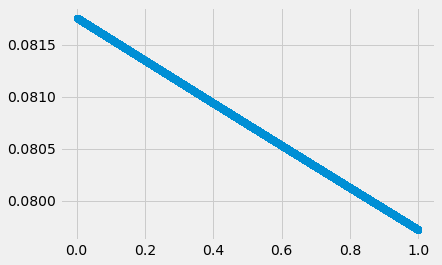

In [51]:
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(app_train[['SK_ID_CURR']], app_train['TARGET'])

pred_probs = logistic_model.predict_proba(app_train[['SK_ID_CURR']])
plt.scatter(app_train['SK_ID_CURR'], pred_probs[:,1])

# Prédiction des libellés

Utiliser la méthode predict() pour retourner la prédiction pour chaque label du set de training.
Le paramètre de la méthode predict() correspond à celui de la méthode predict_proba
Assigner le résultat à la variable fitted_labels.
Afficher les 10 premières valeurs de fitted_labels.
Tracer le graphique de la régression logistique.

In [40]:
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(app_train[['SK_ID_CURR']], app_train['TARGET'])

fitted_labels = logistic_model.predict(app_train[['SK_ID_CURR']])

In [47]:
fitted_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Validation croise

In [69]:
len(app_train)

307511

In [70]:
# .index

In [76]:
pd.options.mode.chained_assignment = None
np.random.seed(1)

#stripped_commas = app_train['TARGET'].str.replace(',', '')
#stripped_dollars = stripped_commas.str.replace('$','')
#app_train['TARGET'] = stripped_dollars.astype('float')

shuffled_index = np.random.permutation(app_train.index)
app_train = app_train.reindex(shuffled_index)

split_one = app_train.iloc[0:153755]
split_two = app_train.iloc[153755:]

In [77]:
split_one

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
64282,174545,0,0,1,0,135000.0,654498.0,31617.0,585000.0,0.005313,...,0,0,0,0,0,0,0,0,1,True
94645,209898,0,1,1,0,135000.0,234576.0,25393.5,202500.0,0.010643,...,0,0,0,0,0,0,0,0,0,False
306349,454938,0,1,1,0,112500.0,157914.0,16753.5,139500.0,0.032561,...,0,0,0,0,0,0,1,0,0,False
258314,398930,0,1,0,0,247500.0,1125000.0,36292.5,1125000.0,0.011703,...,0,0,0,0,0,0,0,0,0,False
87597,201672,0,0,1,0,202500.0,900000.0,35158.5,900000.0,0.010006,...,0,0,0,0,1,0,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193547,324446,0,1,1,1,74250.0,101880.0,10206.0,90000.0,0.022625,...,0,0,0,0,0,0,0,0,0,False
128282,248804,0,1,0,0,135000.0,239850.0,25830.0,225000.0,0.072508,...,0,0,0,1,0,0,1,0,0,False
208065,341158,1,1,1,0,135000.0,315000.0,15750.0,315000.0,0.019689,...,0,0,0,0,0,0,1,0,0,False
195032,326153,0,0,1,0,29250.0,95940.0,9472.5,90000.0,0.031329,...,0,0,0,0,1,0,1,0,0,True


In [78]:
split_two

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
212980,346803,0,1,1,1,225000.0,679500.0,26946.0,679500.0,0.028663,...,0,0,0,1,0,0,1,0,0,False
12993,115145,1,0,1,0,45000.0,180000.0,9000.0,180000.0,0.018209,...,0,0,0,0,0,0,0,0,0,False
74367,186243,0,1,1,1,157500.0,1183963.5,34749.0,927000.0,0.046220,...,0,0,0,0,0,0,0,0,0,False
118337,237222,0,0,0,1,112500.0,1546020.0,40914.0,1350000.0,0.018801,...,0,0,0,0,1,0,1,0,0,False
34226,139662,0,1,0,0,225000.0,521280.0,26649.0,450000.0,0.030755,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,124980,0,0,1,1,292500.0,2013840.0,53253.0,1800000.0,0.025164,...,0,0,0,1,0,0,1,0,0,False
117583,236346,0,0,1,0,157500.0,599778.0,32665.5,477000.0,0.010032,...,0,0,0,1,0,0,1,0,0,False
73349,185050,1,0,1,2,135000.0,270000.0,13500.0,270000.0,0.046220,...,0,0,0,0,0,0,0,0,0,False
267336,409734,0,0,1,1,135000.0,781920.0,47835.0,675000.0,0.008625,...,0,0,0,0,0,0,0,0,0,False


Entrainer un modèle des k plus proches voisins en utilisant l'algorithme par défaut (auto) et le nombre de voisins par défaut (5) en:
Utilisant la colonne 'accommodates' de train_one (première moitié du dataset) pour l'entrainement et
Et le tester sur test_one (seconde moitié du dataset).
Assigner la valeur RMSE résultante (racine carrée erreur quadratique moyenne) à la variable iteration_one_rmse.
Entrainer un modèle des k plus proches voisins en utilisant l'algorithme par défaut (auto) et le nombre de voisins par défaut (5):
Utiliser la colonne 'accommodates' de train_two (seconde moitié du dataset cette fois) pour l'entrainement et
Et le tester sur test_two (première moitié du dataset).
Assigner la valeur RMSE résultante à la variable iteration_two_rmse.
Utiliser numpy.mean() pour calculer la moyenne des 2 valeurs RMSE et assigner le résultat à la variable avg_rmse.
Afficher le résultat

In [79]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

# première moitié
model = KNeighborsRegressor()
model.fit(train_one[['SK_ID_CURR']], train_one['TARGET'])
test_one['predicted_TARGET'] = model.predict(test_one[['SK_ID_CURR']])
iteration_one_rmse = mean_squared_error(test_one['TARGET'], test_one['predicted_TARGET'])**(1/2)

# seconde moitié
model.fit(train_two[['SK_ID_CURR']], train_two['TARGET'])
test_two['predicted_TARGET'] = model.predict(test_two[['SK_ID_CURR']])
iteration_two_rmse = mean_squared_error(test_two['TARGET'], test_two['predicted_TARGET'])**(1/2)

avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])
print(iteration_one_rmse, iteration_two_rmse, avg_rmse)

0.29865938741951603 0.2984045900113785 0.2985319887154473


# Validation croisée des K-Fold

Ajouter une nouvelle colonne au DataFrame paris_listings qu'on nomme 'fold' qui contient le numéro du fold de chaque ligne:
Fold 1 doit avoir des lignes d'index 0 à 1600, y compris ces 2 lignes.
Fold 2 doit avoir des lignes d'index 1600 à 3200, y compris ces 2 lignes.
Fold 3 doit avoir des lignes d'index 3200 à 4800, y compris ces 2 lignes.
Fold 4 doit avoir des lignes d'index 4800 à 6400, y compris ces 2 lignes.
Fold 5 doit avoir des lignes d'index 6400 à 8000, y compris ces 2 lignes.
Afficher le nombre de valeurs pour chaque colonne 'fold' pour confirmer que chaque fold contient à peu près le même nombre d'éléments.

In [80]:
app_train['fold'] = 0
app_train['fold'].iloc[0:60502] = 1
app_train['fold'].iloc[61502:123004] = 2
app_train['fold'].iloc[123004:184506] = 3
app_train['fold'].iloc[184506:246008] = 4
app_train['fold'].iloc[246008:307511] = 5

print(app_train['fold'].value_counts())

5    61503
4    61502
3    61502
2    61502
1    60502
0     1000
Name: fold, dtype: int64


Première itération
Entrainer un modèle des k plus proches voisins en utilisant la colonne 'accommodates' comme unique caractéristique sur le set de training (folds 2 à 5 du DataFrame paris_listings).
Utiliser le modèle pour faire des prédictions sur le set de test (colonne 'accommodates' du fold 1) et assigner les résultats prédits à la variable labels.
Calculer la valeur RMSE en comparant la colonne 'price' avec les valeurs prédites labels.
Assigner la valeur RMSE à la variable iteration_one_rmse.
Afficher le résultat

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [82]:
# != 1
# == 1

In [83]:
# Entrainement
model = KNeighborsRegressor()
train_iteration_one = app_train[app_train['fold'] !=1]
test_iteration_one = app_train
[app_train['fold'] == 1]
model.fit(train_iteration_one[['SK_ID_CURR']], train_iteration_one['TARGET'])

# prédiction
labels = model.predict(test_iteration_one[['SK_ID_CURR']])
test_iteration_one['predicted_TARGET'] = labels
iteration_one_mse = mean_squared_error(test_iteration_one['TARGET'], test_iteration_one['predicted_TARGET'])
iteration_one_rmse = iteration_one_mse**(1/2)

print(iteration_one_rmse)

0.25543409432812464


# Fonction pour entrainer des modèles

Ecrire une fonction qu'on nommera train_and_validate qui prend un dataframe en premier paramètre (df) et une liste de valeurs de numéros fold (1 à 5 dans notre cas) en 2e paramètre (folds). Cette fonction devra:
Entrainer n modèles (où n est le numéro de fold) et exécuter une validation croisée des k-fold (en utilisant n folds). Utiliser la valeur de k par défaut pour la classe KNeighborsRegressor.
Retourner la liste des valeurs RMSE, où le premier élément est quand fold 1 est le set de test, le second élément est quand fold 2 est le set de test, et ainsi de suite.
Utiliser la fonction train_and_validate pour retourner la liste des valeurs RMSE pour le dataframe paris_listings et l'assigner à la variable rmses.
Calculer la moyenne de ces valeurs et l'assigner à la variable avg_rmse.
Afficher rmses et avg_rmse.

In [84]:
# train = app_train[app_train['fold'] != fold]

In [85]:
fold_ids = [1, 2, 3, 4, 5]

def train_and_validate(df, folds):
    fold_rmses = []
    for fold in folds:
        #entrainement
        model = KNeighborsRegressor()
        train = df[df['fold'] != fold]
        test = df[df['fold'] == fold]
        model.fit(train[['SK_ID_CURR']], train['TARGET'])
        
        #prédiction
        labels = model.predict(test[['SK_ID_CURR']])
        test['predicted_TARGET'] = labels
        mse = mean_squared_error(test['TARGET'], test['predicted_TARGET'])
        rmse = mse**(1/2)
        fold_rmses.append(rmse)
    return(fold_rmses)

rmses = train_and_validate(app_train, fold_ids)
print(rmses)

avg_rmse = np.mean(rmses)
print(avg_rmse)

[0.2993276434184496, 0.29888957990573783, 0.29685132898738475, 0.3018667598425893, 0.2971062382504114]
0.2988083100809146


# Exécuter une validation croisée des K-Fold en utilisant Scikit-Learn

Créer une nouvelle instance de la classe KFold avec les propriétés suivantes:
5 folds,
Définir shuffle à True,
Définir random_state à 1 (pour avoir le même résultat que moi),
Assigné à la variable kf.
Créer une nouvelle instance de la classe KNeighborsRegressor et l'assigner à la variable knn.
Utiliser la fonction cross_val_score() pour effectuer la validation croisée des k-fold en:
Utilisant l'instance KNeighborsRegressor knn,
Utilisant la colonne 'SK_ID_CURR' pour l'entrainement,
Utilisant la colonne 'TARGET' pour la colonne cible,
Retournant un tableau de valeurs de MSE (une valeur pour chaque fold).
Assigner la liste résultante de valeurs de MSE à la variable mses. Ensuite, prendre la valeur absolue suivi de la racine carrée de chaque valeur MSE.
Enfin, calculer la moyenne des valeurs RMSE résultantes et assigner le résultat à la variable avg_rmse.

In [86]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(5, shuffle=True, random_state=1)
knn = KNeighborsRegressor()
mses = cross_val_score(knn, app_train[['SK_ID_CURR']], app_train['TARGET'],
                      scoring='neg_mean_squared_error', cv=kf)
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)

print(rmses)
print(avg_rmse)

[0.29736224 0.29929622 0.30120351 0.29687543 0.29711084]
0.2983696481610376


# Explorer différentes valeurs de k

In [88]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, app_train[["SK_ID_CURR"]], app_train["TARGET"],
                           scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  0.29858211588497324 std RMSE:  0.0013000282673716241
5 folds:  avg RMSE:  0.2983696481610376 std RMSE:  0.0016565892894283144
7 folds:  avg RMSE:  0.2983688857942412 std RMSE:  0.0016760513229713177
9 folds:  avg RMSE:  0.29841549229003794 std RMSE:  0.0021855781896395992
10 folds:  avg RMSE:  0.29839674281833717 std RMSE:  0.0020333311842003583
11 folds:  avg RMSE:  0.29834397014932174 std RMSE:  0.002670434600175866
13 folds:  avg RMSE:  0.2985197285241888 std RMSE:  0.001814216868324142
15 folds:  avg RMSE:  0.29850436483093445 std RMSE:  0.0024140197917887586
17 folds:  avg RMSE:  0.29831397035317553 std RMSE:  0.0028041589388674397
19 folds:  avg RMSE:  0.29850448218299364 std RMSE:  0.0031704183617047104
21 folds:  avg RMSE:  0.2984491047699042 std RMSE:  0.0033723356455202568
23 folds:  avg RMSE:  0.2985645400536966 std RMSE:  0.0035084768790285413
